In [2]:
import numpy as np
import scipy.signal as sig
import soundfile as sf
import matplotlib.pyplot as plt 

# Peak-filter (Glockenfilter in German)

Peak-filter are defined by their gain at a given frequenvy. Furthermore, the form of the paek can be changed by the Q factor.
The basis of the peak-filter is an analog bandpass filter
$$ H(s) = \frac{\frac{1}{Q}s}{s^2 + \frac{1}{Q} s + 1} $$

By multiplying this soulution with a Gain $H_0$ and add 1 to ensure 0 dB at 0 and $\infty$ Hz, the final system function is given by 

$$  H(s) = \frac{ s^2 +  (H_0+1)\frac{1}{Q}s + 1}{s^2 + \frac{1}{Q} s + 1}$$

The lowpass-lowpass transform gives the final analog coefficients and $H_0+1 = G$ shortens the final design routine.


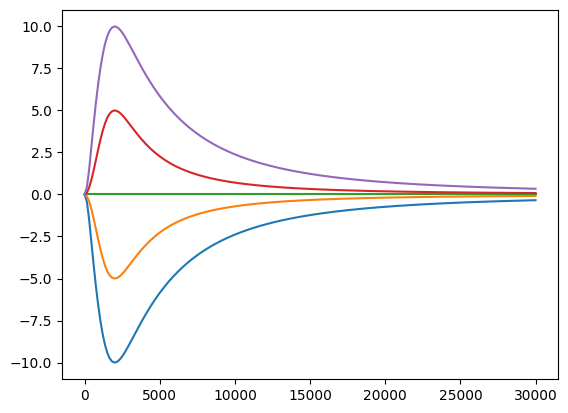

In [3]:
def get_peak_secondorder_analog(freq_Hz, gain_dB, Q = 1/np.sqrt(2)):
    om = 2*np.pi*freq_Hz
    if gain_dB >= 0:
        g = 10**(gain_dB/20)
        d_norm = [1, g/Q, 1]
        c_norm = [1, 1/Q, 1]
        d , c = sig.lp2lp(d_norm,c_norm,om)
    else:
        g = 10**(-gain_dB/20)
        d_norm = [1, g/Q, 1]
        c_norm = [1, 1/Q, 1]

        d , c = sig.lp2lp(c_norm,d_norm,om)
    return d,c

freq = 2000
gain_dB = np.linspace(-10,10,num=5)
Q = 0.7

fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_peak_secondorder_analog(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(w/(2*np.pi), 20*np.log10(np.abs(tf)))


in order to see the symmetry a logarithmic x axis is necessary 

/tmp/ipykernel_67312/3685446744.py:7: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(w/(2*np.pi)), 20*np.log10(np.abs(tf)))


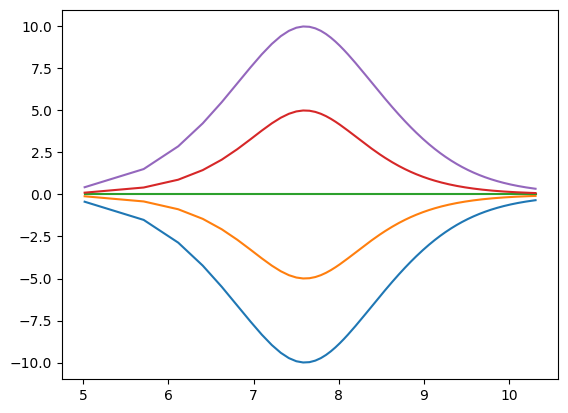

In [4]:
fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_peak_secondorder_analog(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(np.log(w/(2*np.pi)), 20*np.log10(np.abs(tf)))


Again, this design needs a switch for positive and negative gains. 
A better solution and generalized solution is given by Robert Bristow-Johnson (RBJ)

$$  H(s) = \frac{ s^2 +  2 G \alpha s + 1}{s^2 + 2 \alpha s + 1}$$

The solution above is given, ig $\alpha = \frac{1}{2Q}

The alternative by RBJ is
$$ \alpha = \frac{1}{\sqrt{G}} \sinh \left( \ln(2)/2 B_{oct} \right)

with $B_{oct}$ the bandwidth of the peak-filter given in octaves. The relation between Q and $B_{Oct}$ is



/tmp/ipykernel_67312/1890547387.py:30: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(w/(2*np.pi)), 20*np.log10(np.abs(tf)))


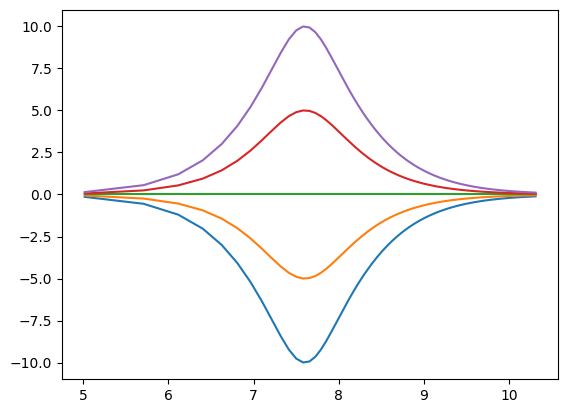

In [7]:

def Q_to_bandwidth_analog(Q):
    '''function to convert Q in Bandwidth (analog)
    Parameter: Q: the desired Q factor

    returns: Bandwidth in Octaves'''
    BW = np.arcsinh(1/(2*Q))/(np.log(2)/2)
    return BW


def get_peak_secondorder_analogRBJ(freq_Hz, gain_dB, Q = 1/np.sqrt(2)):
    om = 2*np.pi*freq_Hz
    g = 10**(gain_dB/20)
    B_oct = Q_to_bandwidth_analog(Q)
    alpha = 1/np.sqrt(g) * np.sinh(np.log(2)/2 * B_oct)
    d_norm = [1, 2*g*alpha, 1]
    c_norm = [1, 2*alpha, 1]
    d , c = sig.lp2lp(d_norm,c_norm,om)
    return d,c

freq = 2000
gain_dB = np.linspace(-10,10,num=5)
Q = 0.7

fig, ax = plt.subplots()

for kk,one_gain in enumerate(gain_dB):
    d,c = get_peak_secondorder_analogRBJ(freq,one_gain,Q)
    freq_vec = 2*np.pi*np.linspace(0, 30000, num=200)
    w , tf = sig.freqs(d, c, freq_vec)
    ax.plot(np.log(w/(2*np.pi)), 20*np.log10(np.abs(tf)))